<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
!pip install pandas 
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 161.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 166.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 101.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 115.0 MB/s eta 0:00:00


**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-09-28 19:23:52--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  76.0MB/s    in 2.0s    

2025-09-28 19:23:54 (76.0 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


Rows plotted: 23349


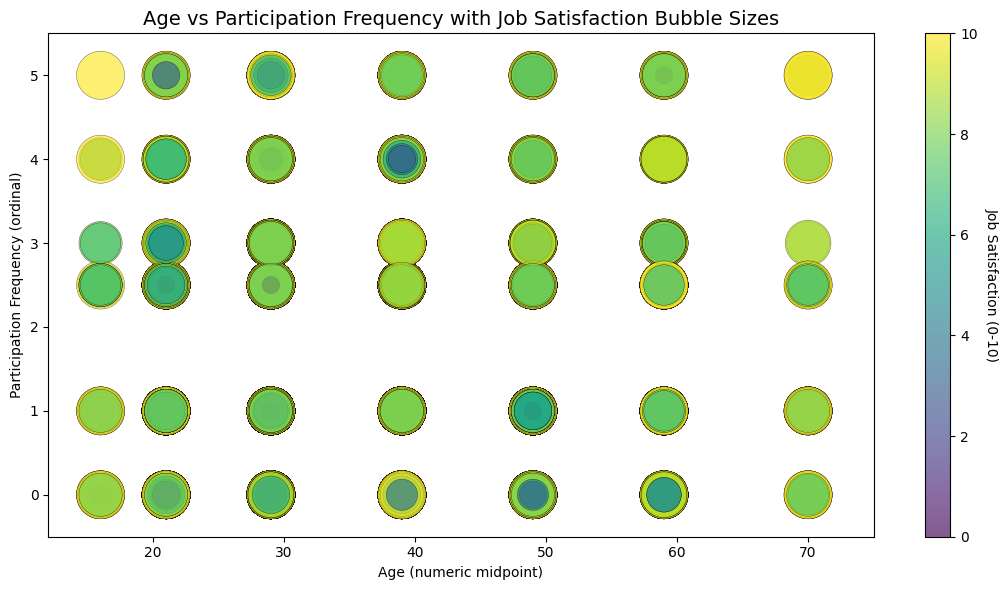

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Make a safe copy
df_bubble = df.copy()

# ---- 1) Map Age (category -> numeric midpoint) ----
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70,
    'Prefer not to say': np.nan
}
df_bubble['Age_num'] = df_bubble['Age'].map(age_map)

# ---- 2) Map SOPartFreq (text -> ordinal numeric) ----
freq_map = {
    'Multiple times per day': 5,
    'Daily or almost daily': 4,
    'A few times per week': 3,
    # your dataset has this hybrid label; we put it between weekly and monthly
    'A few times per month or weekly': 2.5,
    'A few times per month': 2,  # if you have this exact label elsewhere
    'Less than once per month or monthly': 1,
    'I have never participated in Q&A on Stack Overflow': 0
}
df_bubble['SOPartFreq_num'] = df_bubble['SOPartFreq'].map(freq_map)

# ---- 3) Ensure JobSat is numeric (0-10) ----
df_bubble['JobSat_num'] = pd.to_numeric(df_bubble['JobSat'], errors='coerce')

# ---- 4) Drop rows with missing converted values ----
df_bubble = df_bubble.dropna(subset=['Age_num', 'SOPartFreq_num', 'JobSat_num']).copy()

# If you want to inspect how many rows remain:
print(f"Rows plotted: {len(df_bubble)}")

# ---- 5) Create bubble plot with matplotlib ----
x = df_bubble['Age_num']
y = df_bubble['SOPartFreq_num']
c = df_bubble['JobSat_num']     # color (colormap)
s_raw = df_bubble['JobSat_num'] # use JobSat for bubble size too

# Normalize sizes so they look good visually
# You can tune the multiplier (here 80) or use another transform (sqrt, squared)
size_min, size_max = 40, 1200
s = ((s_raw - s_raw.min()) / (s_raw.max() - s_raw.min() + 1e-9))  # 0..1
s = size_min + s * (size_max - size_min)

plt.figure(figsize=(11, 6))
sc = plt.scatter(x, y, s=s, c=c, cmap='viridis', alpha=0.65, edgecolor='k', linewidth=0.3)

plt.title("Age vs Participation Frequency with Job Satisfaction Bubble Sizes", fontsize=14)
plt.xlabel("Age (numeric midpoint)")
plt.ylabel("Participation Frequency (ordinal)")

# Colorbar for JobSat
cbar = plt.colorbar(sc)
cbar.set_label('Job Satisfaction (0-10)', rotation=270, labelpad=15)

# Create a custom legend for bubble sizes (example sizes)
for job_val in [0, 5, 10]:
    # map job_val to a plotted size for legend
    prop = ((job_val - s_raw.min()) / (s_raw.max() - s_raw.min() + 1e-9))
    prop_size = size_min + prop * (size_max - size_min)
    plt.scatter([], [], s=prop_size, c='gray', alpha=0.6, edgecolor='k',
                linewidth=0.3, label=f'JobSat = {job_val}')

plt.xlim(12, 75)  # set x-limits to show all age midpoints nicely
plt.ylim(-0.5, 5.5)  # y-limits to show participation 0..5 clearly
plt.tight_layout()
plt.show()



#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


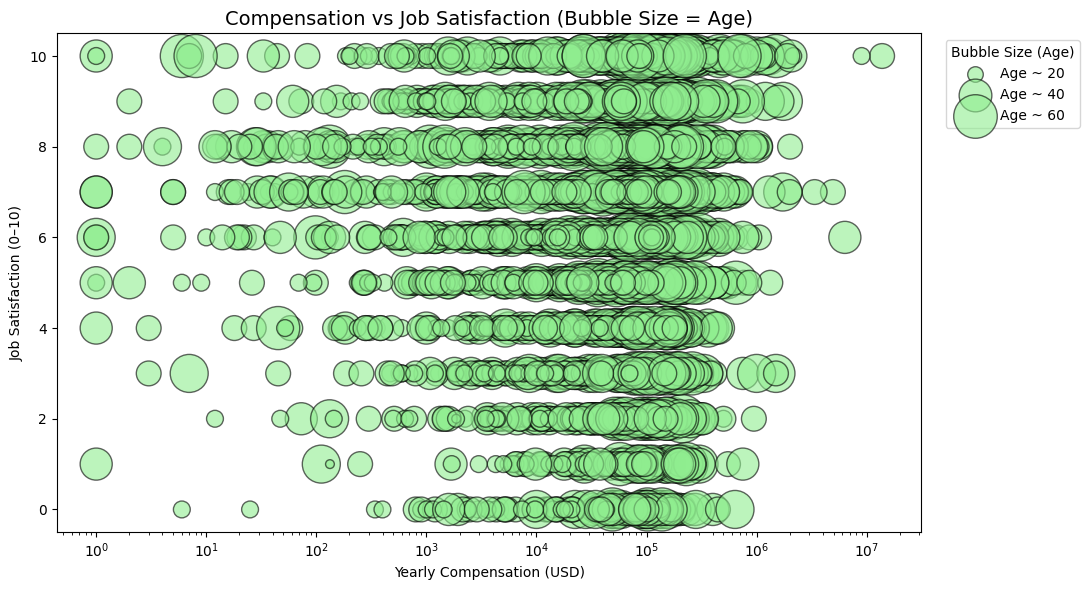

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Prepare data ---
df_bubble2 = df.dropna(subset=['ConvertedCompYearly','JobSat','Age']).copy()

# Ensure numeric values
df_bubble2['ConvertedCompYearly'] = pd.to_numeric(df_bubble2['ConvertedCompYearly'], errors='coerce')
df_bubble2['JobSat_num'] = pd.to_numeric(df_bubble2['JobSat'], errors='coerce')

# Map age categories (if Age column is text)
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70,
    'Prefer not to say': np.nan
}
if df_bubble2['Age'].dtype == 'object':
    df_bubble2['Age_num'] = df_bubble2['Age'].map(age_map)
else:
    df_bubble2['Age_num'] = pd.to_numeric(df_bubble2['Age'], errors='coerce')

df_bubble2 = df_bubble2.dropna(subset=['ConvertedCompYearly','JobSat_num','Age_num'])

# --- 2. Bubble sizes based on Age ---
s_raw = df_bubble2['Age_num']
size_min, size_max = 40, 1200
s = ((s_raw - s_raw.min()) / (s_raw.max() - s_raw.min() + 1e-9))
s = size_min + s * (size_max - size_min)

# --- 3. Bubble plot ---
plt.figure(figsize=(11,6))
plt.scatter(
    df_bubble2['ConvertedCompYearly'],
    df_bubble2['JobSat_num'],
    s=s,
    c='lightgreen',   # all bubbles same color
    alpha=0.6,
    edgecolor='k'
)

plt.title("Compensation vs Job Satisfaction (Bubble Size = Age)", fontsize=14)
plt.xlabel("Yearly Compensation (USD)")
plt.ylabel("Job Satisfaction (0–10)")

# --- 4. Legend for Age as bubble size ---
for age_val in [20, 40, 60]:
    prop = ((age_val - s_raw.min()) / (s_raw.max() - s_raw.min() + 1e-9))
    prop_size = size_min + prop * (size_max - size_min)
    plt.scatter([], [], s=prop_size, c='lightgreen', alpha=0.6, edgecolor='k',
                label=f'Age ~ {age_val}')
plt.legend(title="Bubble Size (Age)", bbox_to_anchor=(1.02, 1), loc='upper left')

plt.xscale("log")  # Compensation usually spans wide range → log scale makes plot readable
plt.ylim(-0.5, 10.5)
plt.tight_layout()
plt.show()


### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



/tmp/ipykernel_299/1095722513.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lang_counts = df_lang.groupby(['Age', 'Language']).size().reset_index(name='Count')


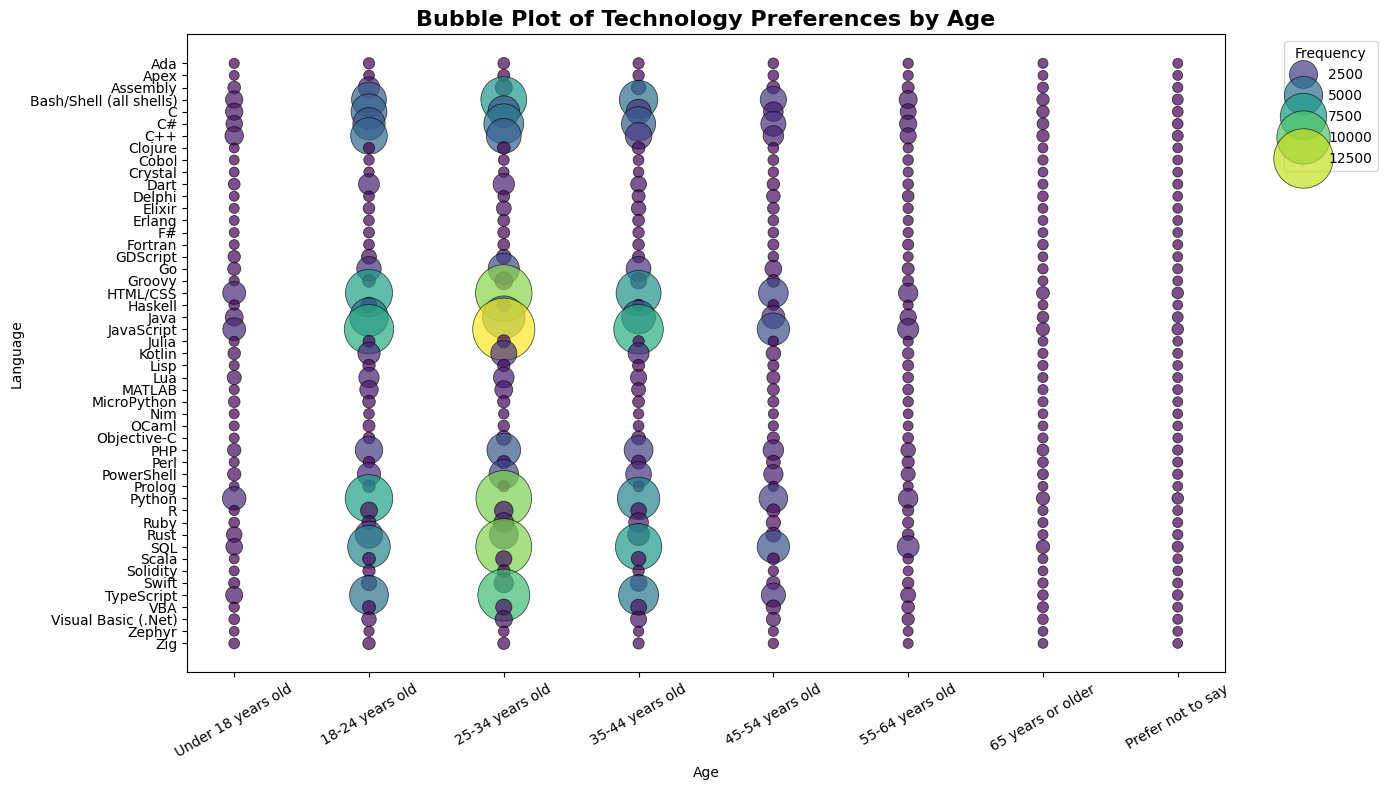

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the order of age groups explicitly
age_order = [
    "Under 18 years old",
    "18-24 years old",
    "25-34 years old",
    "35-44 years old",
    "45-54 years old",
    "55-64 years old",
    "65 years or older",
    "Prefer not to say"
]

# Apply ordering to Age column
df_lang['Age'] = pd.Categorical(df_lang['Age'], categories=age_order, ordered=True)

# Recompute counts
lang_counts = df_lang.groupby(['Age', 'Language']).size().reset_index(name='Count')

# Bubble plot
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=lang_counts,
    x="Age",
    y="Language",
    size="Count",
    sizes=(50, 2000),
    hue="Count",
    palette="viridis",
    alpha=0.7,
    edgecolor="black"
)

plt.title("Bubble Plot of Technology Preferences by Age", fontsize=16, weight='bold')
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Frequency")
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


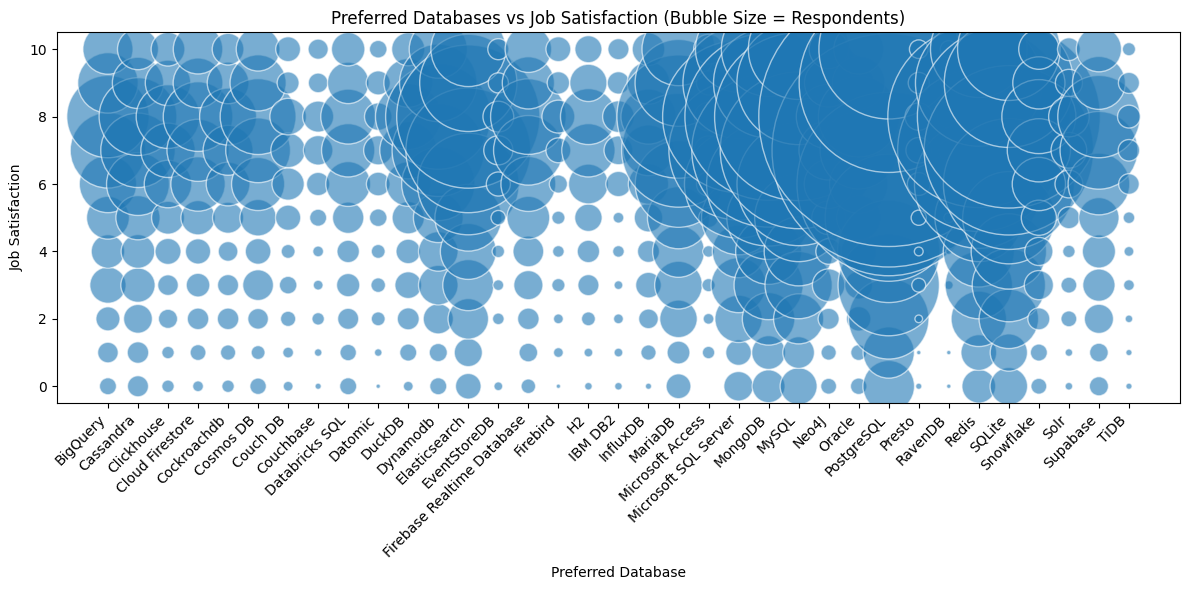

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: expand multiple database selections if column is multi-valued
df_db = df.dropna(subset=["DatabaseWantToWorkWith", "JobSat"]).copy()
df_db = df_db.assign(DatabaseWantToWorkWith=df_db["DatabaseWantToWorkWith"].str.split(";"))
df_db = df_db.explode("DatabaseWantToWorkWith")

# Group by database and job satisfaction
db_counts = df_db.groupby(["DatabaseWantToWorkWith", "JobSat"]).size().reset_index(name="Respondents")

# Bubble plot
plt.figure(figsize=(12, 6))
plt.scatter(
    x=db_counts["DatabaseWantToWorkWith"],
    y=db_counts["JobSat"],
    s=db_counts["Respondents"] * 10,  # scale bubble size
    alpha=0.6,
    edgecolors="w"
)

plt.xticks(rotation=45, ha="right")
plt.xlabel("Preferred Database")
plt.ylabel("Job Satisfaction")
plt.title("Preferred Databases vs Job Satisfaction (Bubble Size = Respondents)")
plt.tight_layout()
plt.show()


### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


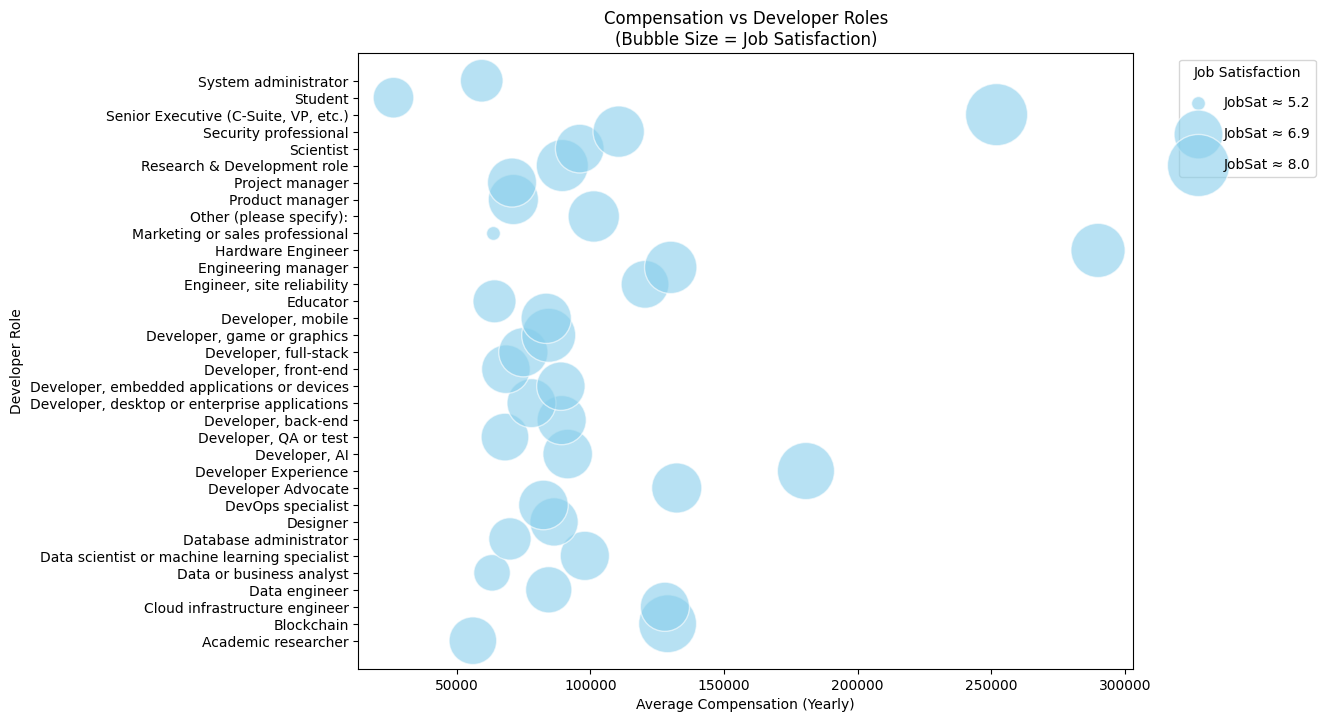

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Drop missing values
df_roles = df.dropna(subset=['ConvertedCompYearly', 'DevType', 'JobSat'])

# Group by Developer Role
role_comp = df_roles.groupby("DevType").agg({
    "ConvertedCompYearly": "mean",   # average compensation
    "JobSat": "mean",                # average job satisfaction
}).reset_index()

# Add respondent counts separately
role_comp["RespondentCount"] = df_roles.groupby("DevType")["DevType"].count().values
import numpy as np
import matplotlib.patches as mpatches

plt.figure(figsize=(10,8))

# Normalize JobSat so bubbles vary more
min_size, max_size = 100, 2000
job_sat_scaled = np.interp(role_comp["JobSat"],
                           (role_comp["JobSat"].min(), role_comp["JobSat"].max()),
                           (min_size, max_size))

scatter = plt.scatter(
    x=role_comp["ConvertedCompYearly"],
    y=role_comp["DevType"],
    s=job_sat_scaled,
    alpha=0.6,
    c="skyblue",
    edgecolors="w"
)

plt.xlabel("Average Compensation (Yearly)")
plt.ylabel("Developer Role")
plt.title("Compensation vs Developer Roles\n(Bubble Size = Job Satisfaction)")

# --- Add a bubble size legend ---
for size in [role_comp["JobSat"].min(), role_comp["JobSat"].mean(), role_comp["JobSat"].max()]:
    plt.scatter([], [], s=np.interp(size,
                                    (role_comp["JobSat"].min(), role_comp["JobSat"].max()),
                                    (min_size, max_size)),
                c="skyblue", alpha=0.6, edgecolors="w", label=f"JobSat ≈ {size:.1f}")

plt.legend(scatterpoints=1, frameon=True, labelspacing=1.2, title="Job Satisfaction", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()





#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


/tmp/ipykernel_299/2030872990.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_tools.groupby(['Age', 'Tool'])


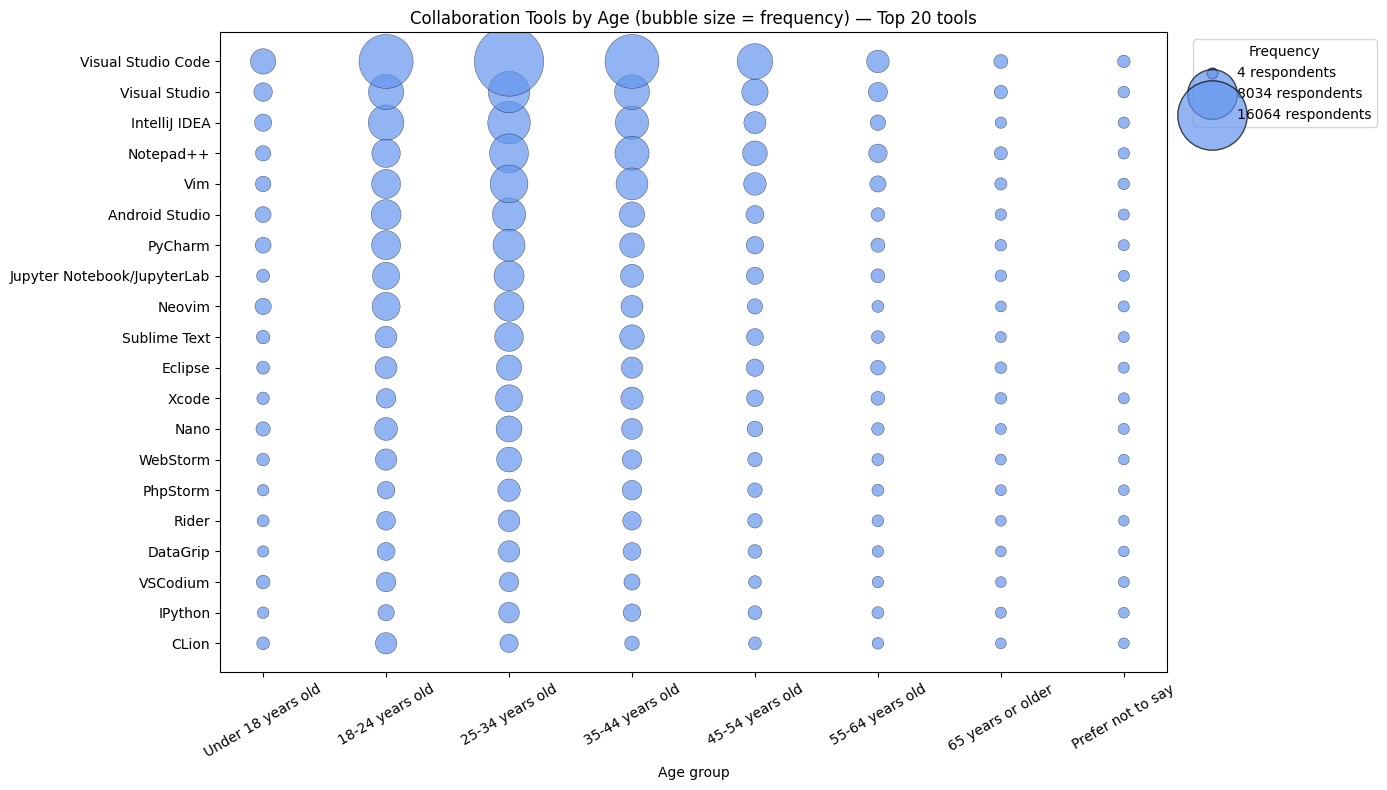

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Make a safe copy
df_tools = df.dropna(subset=['NEWCollabToolsHaveWorkedWith', 'Age']).copy()

# Explode multi-select strings (assumes ';' delimiter; change if different)
df_tools = df_tools.assign(
    Tool = df_tools['NEWCollabToolsHaveWorkedWith'].str.split(';')
).explode('Tool')

# Clean whitespace
df_tools['Tool'] = df_tools['Tool'].str.strip()

# Define age order so "Under 18 years old" is leftmost
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say'
]
df_tools['Age'] = pd.Categorical(df_tools['Age'], categories=age_order, ordered=True)

# Aggregate counts: frequency of each tool within each age group
tool_counts = (
    df_tools.groupby(['Age', 'Tool'])
    .size()
    .reset_index(name='Frequency')
)

# Optionally limit to top N tools overall to reduce clutter
top_n_tools = 20
top_tools = (tool_counts.groupby('Tool')['Frequency'].sum()
                        .sort_values(ascending=False)
                        .head(top_n_tools)
                        .index.tolist())
tool_counts = tool_counts[tool_counts['Tool'].isin(top_tools)].copy()

# Pivot for plotting convenience (not strictly necessary)
# We'll plot each (Age, Tool) as one bubble located at (age_index, tool_index)
age_to_x = {age: i for i, age in enumerate(age_order)}
tool_list = sorted(tool_counts['Tool'].unique(), key=lambda t: -tool_counts[tool_counts['Tool']==t]['Frequency'].sum())
tool_to_y = {tool: i for i, tool in enumerate(tool_list)}

tool_counts['x'] = tool_counts['Age'].map(age_to_x)
tool_counts['y'] = tool_counts['Tool'].map(tool_to_y)

# Scale bubble sizes (Frequency -> marker area)
min_size, max_size = 60, 2500
freq = tool_counts['Frequency'].values
if freq.max() == freq.min():
    sizes = np.full_like(freq, (min_size + max_size) / 2, dtype=float)
else:
    sizes = np.interp(freq, (freq.min(), freq.max()), (min_size, max_size))

# Plot
plt.figure(figsize=(14, 8))
plt.scatter(
    tool_counts['x'],
    tool_counts['y'],
    s=sizes,
    alpha=0.7,
    c='cornflowerblue',
    edgecolors='k',
    linewidth=0.3
)

# Format axes: replace numeric ticks with category labels
plt.xticks(ticks=list(age_to_x.values()), labels=list(age_to_x.keys()), rotation=30)
plt.yticks(ticks=list(tool_to_y.values()), labels=list(tool_to_y.keys()))
plt.xlabel('Age group')
plt.title(f'Collaboration Tools by Age (bubble size = frequency) — Top {top_n_tools} tools')

# Add size legend (choose representative frequencies)
rep_freqs = np.unique(np.round(np.linspace(freq.min(), freq.max(), 3))).astype(int)
for f in rep_freqs:
    s_legend = np.interp(f, (freq.min(), freq.max()), (min_size, max_size))
    plt.scatter([], [], s=s_legend, c='cornflowerblue', alpha=0.7, edgecolors='k',
                label=f'{f} respondents')
plt.legend(title='Frequency', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.gca().invert_yaxis()   # optional: show most-frequent tool near top
plt.tight_layout()
plt.show()


### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



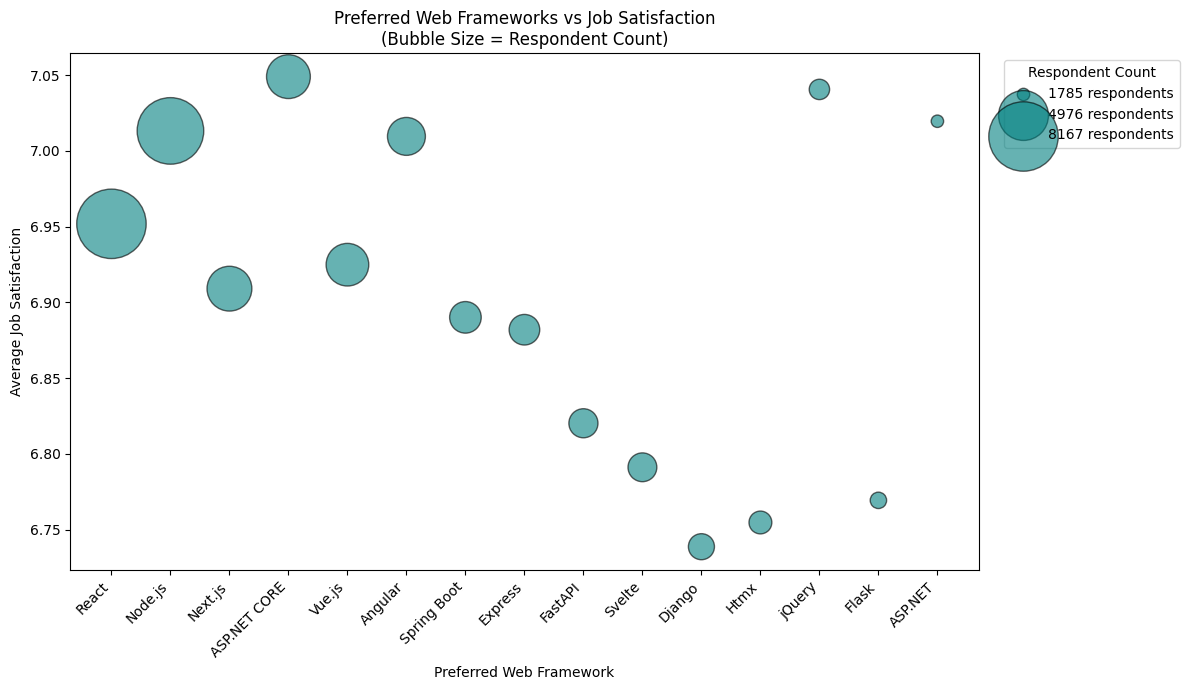

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Make a safe copy and drop missing
df_web = df.dropna(subset=['WebframeWantToWorkWith', 'JobSat']).copy()

# Explode multi-select answers (assuming ";" delimiter — adjust if different)
df_web = df_web.assign(
    Framework = df_web['WebframeWantToWorkWith'].str.split(';')
).explode('Framework')

# Clean whitespace
df_web['Framework'] = df_web['Framework'].str.strip()

# Group by framework and calculate metrics
framework_stats = (
    df_web.groupby('Framework')
    .agg(
        RespondentCount=('Framework', 'count'),
        AvgJobSat=('JobSat', 'mean')
    )
    .reset_index()
)

# Optionally filter top frameworks by respondent count
top_n = 15
top_frameworks = framework_stats.nlargest(top_n, 'RespondentCount')
    
# Scale bubble size based on number of respondents
min_size, max_size = 80, 2500
sizes = np.interp(top_frameworks['RespondentCount'],
                  (top_frameworks['RespondentCount'].min(), top_frameworks['RespondentCount'].max()),
                  (min_size, max_size))

# Plot
plt.figure(figsize=(12,7))
scatter = plt.scatter(
    x=top_frameworks['Framework'],
    y=top_frameworks['AvgJobSat'],
    s=sizes,
    alpha=0.6,
    c="teal",
    edgecolors="k"
)

plt.xticks(rotation=45, ha="right")
plt.xlabel("Preferred Web Framework")
plt.ylabel("Average Job Satisfaction")
plt.title("Preferred Web Frameworks vs Job Satisfaction\n(Bubble Size = Respondent Count)")

# Add bubble size legend
rep_counts = np.unique(np.round(np.linspace(top_frameworks['RespondentCount'].min(),
                                            top_frameworks['RespondentCount'].max(),
                                            3))).astype(int)
for count in rep_counts:
    plt.scatter([], [], s=np.interp(count,
                                    (top_frameworks['RespondentCount'].min(), top_frameworks['RespondentCount'].max()),
                                    (min_size, max_size)),
                c="teal", alpha=0.6, edgecolors="k", label=f"{count} respondents")
plt.legend(title="Respondent Count", bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()



#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



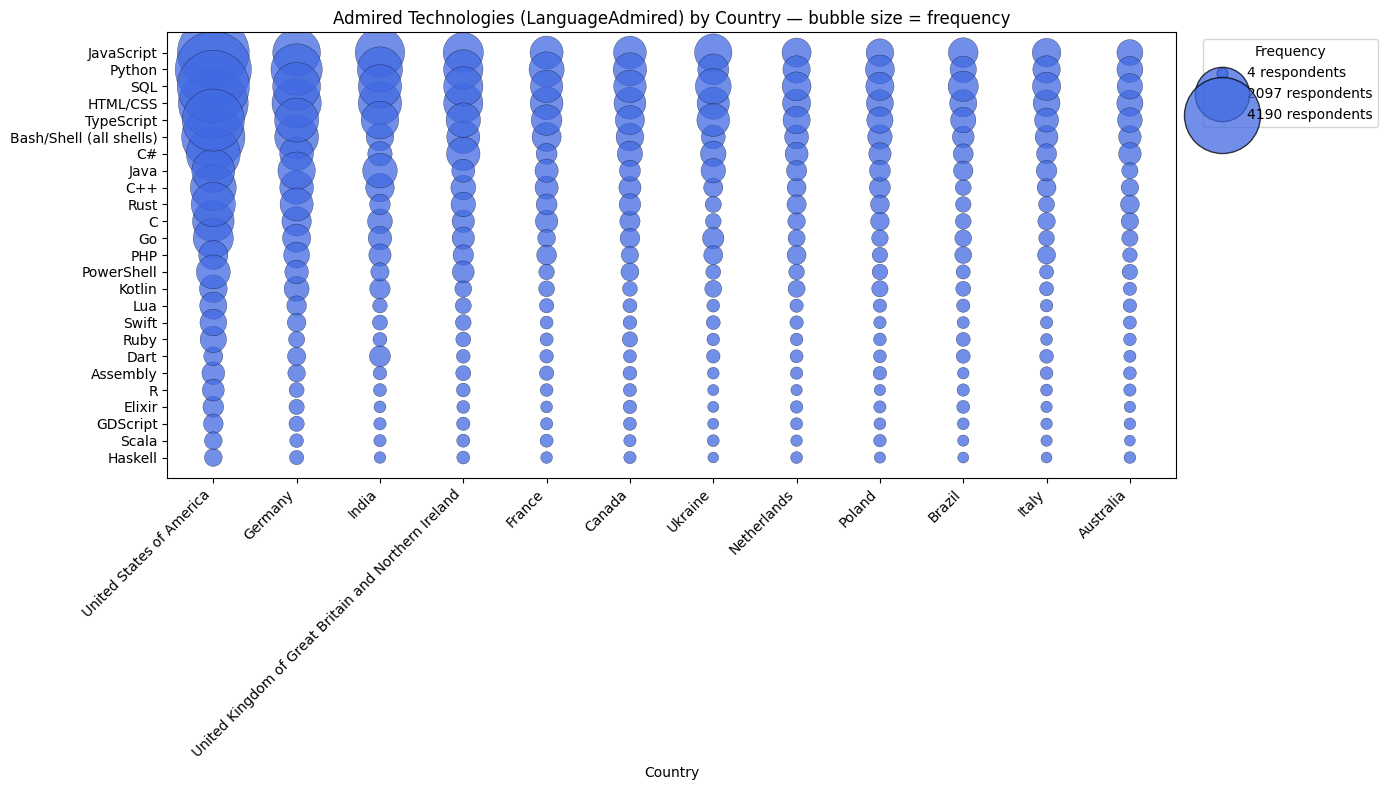

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---- Configuration ----
delimiter = ';'         # change if your multi-select uses ',' or '|'
top_countries = 12      # number of countries to show (set lower if crowded)
top_languages = 25      # number of languages/tools to show (set lower if crowded)
min_size, max_size = 60, 3000   # marker area range (tweak visually)

# ---- 1) Prepare data ----
df_adm = df.dropna(subset=['LanguageAdmired', 'Country']).copy()

# explode multi-select column into rows
df_adm = df_adm.assign(Language = df_adm['LanguageAdmired'].str.split(delimiter)).explode('Language')
df_adm['Language'] = df_adm['Language'].str.strip()

# Basic cleaning: drop empty strings
df_adm = df_adm[df_adm['Language'].notna() & (df_adm['Language'] != '')].copy()

# ---- 2) Select top countries and languages to keep plot readable ----
# Determine the top countries by total responses
top_country_list = (df_adm['Country']
                    .value_counts()
                    .head(top_countries)
                    .index
                    .tolist())

# Determine the top languages overall (within selected countries)
lang_totals = (df_adm[df_adm['Country'].isin(top_country_list)]
               .groupby('Language').size().sort_values(ascending=False))
top_lang_list = lang_totals.head(top_languages).index.tolist()

# Filter to selected top items
df_plot = df_adm[df_adm['Country'].isin(top_country_list) & df_adm['Language'].isin(top_lang_list)].copy()

# ---- 3) Aggregate frequencies (Frequency = number of respondents who admire that language in that country) ----
freq = (df_plot.groupby(['Country', 'Language']).size()
        .reset_index(name='Frequency'))

# If a country-language pair doesn't exist it'll be absent; that's fine (freq = 0 not plotted)

# ---- 4) Map categories to numeric positions for plotting (x = country index, y = language index) ----
country_order = top_country_list
language_order = top_lang_list

country_to_x = {c: i for i, c in enumerate(country_order)}
language_to_y = {l: i for i, l in enumerate(language_order)}

freq['x'] = freq['Country'].map(country_to_x)
freq['y'] = freq['Language'].map(language_to_y)

# ---- 5) Scale bubble sizes from Frequency to marker area ----
if len(freq) == 0:
    raise ValueError("No data to plot after filtering. Try increasing top_countries/top_languages or check the delimiter.")

f_vals = freq['Frequency'].values
if f_vals.max() == f_vals.min():
    sizes = np.full_like(f_vals, (min_size + max_size) / 2, dtype=float)
else:
    sizes = np.interp(f_vals, (f_vals.min(), f_vals.max()), (min_size, max_size))

# ---- 6) Plot ----
plt.figure(figsize=(14, 8))
plt.scatter(freq['x'], freq['y'], s=sizes, alpha=0.75, c='royalblue', edgecolors='k', linewidth=0.25)

# Format ticks: replace numeric ticks with category labels
plt.xticks(ticks=list(country_to_x.values()), labels=list(country_to_x.keys()), rotation=45, ha='right')
plt.yticks(ticks=list(language_to_y.values()), labels=list(language_to_y.keys()))
plt.xlabel('Country')
plt.title('Admired Technologies (LanguageAdmired) by Country — bubble size = frequency')

# Optional: invert y so the most frequent language (first in list) appears at top
plt.gca().invert_yaxis()

# ---- 7) Add bubble-size legend (representative frequencies) ----
rep_freqs = np.unique(np.round(np.linspace(f_vals.min(), f_vals.max(), 3))).astype(int)
for rf in rep_freqs:
    s_legend = np.interp(rf, (f_vals.min(), f_vals.max()), (min_size, max_size))
    plt.scatter([], [], s=s_legend, c='royalblue', alpha=0.75, edgecolors='k', label=f'{rf} respondents')

plt.legend(title='Frequency', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()


## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
